# Housing Price Prediction

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
housing_data_train = pd.read_csv("train.csv")
housing_data_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [203]:
housing_data_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,68.267123,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.356355,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 1. Feature Engineering

### a) Removing missing/null values

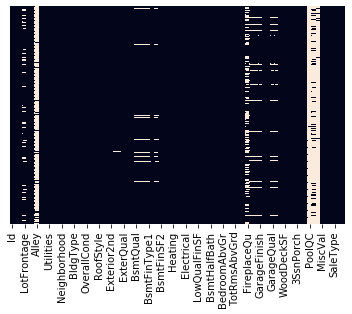

In [195]:
sns.heatmap(housing_data_train.isnull(), yticklabels=False, cbar=False)

In [196]:
def remove_columns(data):
    X = list(data.isnull().sum())
    columns_to_remove = []
    for i in range(len(X)):
        if (X[i]/data.shape[0])>0.3: #removing the columns that have more than 30% missing values
            columns_to_remove.append(data.columns[i])
    return columns_to_remove

drop_columns = remove_columns(housing_data_train)
print("The following columns have more than 30% missing/null values and therefore should be dropped:")
for column in drop_columns:
    print(column)

The following columns have more than 30% missing/null values and therefore should be dropped:
Alley
FireplaceQu
PoolQC
Fence
MiscFeature


In [197]:
#dropping the columns
for column in drop_columns:
    housing_data_train.drop([column], axis=1, inplace=True)
housing_data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


##### Replace other missing values in the columns with respect to their data type
#####       i.e if it is a category label -> replace with mode
#####      if it is a value count -> replcae with mean


In [198]:
null_columns = list(housing_data_train.isnull().sum())
column_names = list(housing_data_train.columns)
print("The respective columns still have null values:")
for i in range(len(list(null_columns))):
    if null_columns[i]!=0:
        print(column_names[i])

The respective columns still have null values:
LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


In [199]:
def replace(data, column, operator='mean'):
    if operator == "mode":
        return data[column].fillna(data[column].mode()[0])
        
    return data[column].fillna(data[column].mode()[0])

In [200]:
housing_data_train["LotFrontage"] = replace(housing_data_train, "LotFrontage")
housing_data_train["MasVnrType"] = replace(housing_data_train, "MasVnrType", "mode")
housing_data_train["MasVnrArea"] = replace(housing_data_train, "MasVnrArea")
housing_data_train["MSZoning"] = replace(housing_data_train, "MSZoning", "mode")
housing_data_train["BsmtCond"] = replace(housing_data_train, "BsmtCond", "mode")
housing_data_train["BsmtQual"] = replace(housing_data_train, "BsmtQual", "mode")
housing_data_train["GarageType"] = replace(housing_data_train, "GarageType", "mode")
housing_data_train["GarageFinish"] = replace(housing_data_train, "GarageFinish", "mode")
housing_data_train["GarageQual"] = replace(housing_data_train, "GarageQual", "mode")
housing_data_train["GarageCond"] = replace(housing_data_train, "GarageCond", "mode")
housing_data_train["GarageYrBlt"] = replace(housing_data_train, "GarageYrBlt", "mode")
housing_data_train["BsmtExposure"] = replace(housing_data_train, "BsmtExposure", "mode")
housing_data_train["BsmtFinType1"] = replace(housing_data_train, "BsmtFinType1", "mode")
housing_data_train["BsmtFinType2"] = replace(housing_data_train, "BsmtFinType2", "mode")
housing_data_train["Electrical"] = replace(housing_data_train, "Electrical", "mode")

In [201]:
housing_data_train.drop(["Id"], axis=1, inplace=True)

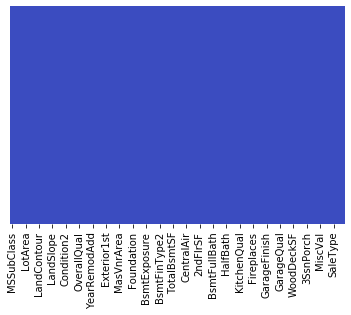

In [202]:
sns.heatmap(housing_data_train.isnull(), yticklabels=False, cbar=False, cmap="coolwarm")

In [192]:
len(list(np.unique(housing_data_train["MSZoning"])))

5

In [ ]:
column_names = list(housing_data_train.columns)
categorical_columns = []
count=0
for name in column_names:
    if housing_data_train[name].dtype==object:
        categorical_columns.append([name, np.unique(housing_data_train[name])])
        count+=1

In [268]:
housing_data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [297]:
housing_data_test = pd.read_csv("test2.csv")

In [298]:
housing_data_test.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [299]:
train_copy = housing_data_train.copy()

In [300]:
housing_data_test.shape

(1459, 74)

In [301]:
#combine train and test data, row-wise
data = pd.concat([train_copy, housing_data_test], axis=0)

In [302]:
data.shape

(2919, 75)

In [303]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [304]:
def category_encoding(dataset):
    category_columns = list(dataset.select_dtypes(include=['object']).columns)
    count=0
    for column in category_columns:
        dataset[column] = dataset[column].astype('category')
        dataset[column] = dataset[column].cat.codes
        count+=1
    return data

In [305]:
data = category_encoding(data)
data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500.0
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500.0
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500.0
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000.0
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000.0
5,50,3,85.0,14115,1,0,3,0,4,0,...,0,320,0,0,700,10,2009,8,4,143000.0
6,20,3,75.0,10084,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,307000.0
7,60,3,60.0,10382,1,0,3,0,0,0,...,228,0,0,0,350,11,2009,8,4,200000.0
8,50,4,51.0,6120,1,3,3,0,4,0,...,205,0,0,0,0,4,2008,8,0,129900.0
9,190,3,50.0,7420,1,3,3,0,0,0,...,0,0,0,0,0,1,2008,8,4,118000.0


In [306]:
train = data.iloc[:1460, :]
test = data.iloc[1460:, :-1]

In [387]:
train_X = train.drop(['SalePrice'], axis=1)
train_Y = train['SalePrice']
test_X = test

In [389]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)

In [390]:
import xgboost

classifier = xgboost.XGBRegressor()
classifier.fit(train_X, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [391]:
y_pred_test = classifier.predict(test_X)

In [392]:
y_pred_test

array([139744.5 , 159788.25, 205259.06, ..., 166680.94, 118124.44,
       216482.39], dtype=float32)

In [395]:
pred = pd.DataFrame(y_pred_test)
sub_df = pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns=['Id', 'SalePrice']
datasets.to_csv('sample_submission.csv', index=False)